### **Task 02**
#### Create a **K-Means clustering algorithm** to **group customers** of a retail store based on their **purchase history**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Setting the plot style
palette = sns.color_palette("bright", 20)
sns.set_theme(style = "white", palette = palette)

In [2]:
data = pd.read_csv("Mall_Customers.csv")
print("Basic Information about the dataset", "\nNumber of rows : ", len(data), "\nNumber of columns : ", len(data.columns),"\n")
data.head()

Basic Information about the dataset 
Number of rows :  200 
Number of columns :  5 



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
X = data.drop(columns=["CustomerID","Gender","Age"],axis=1).values

Text(0, 0.5, 'Spending Score')

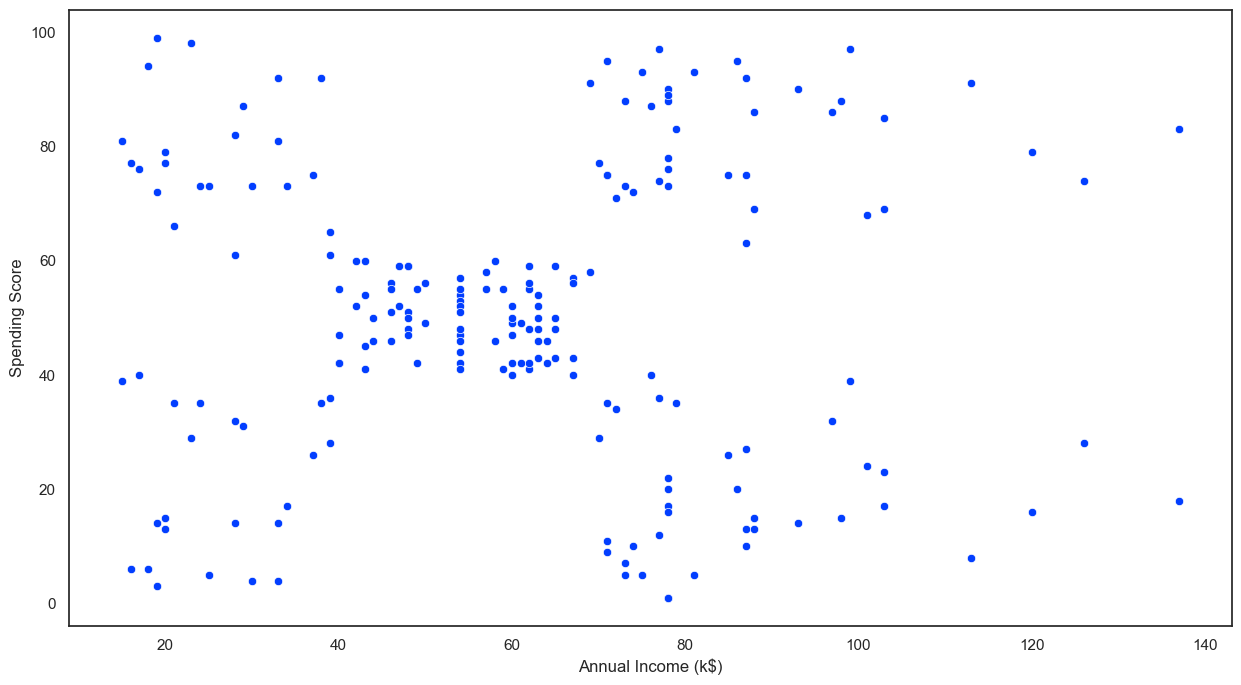

In [7]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")

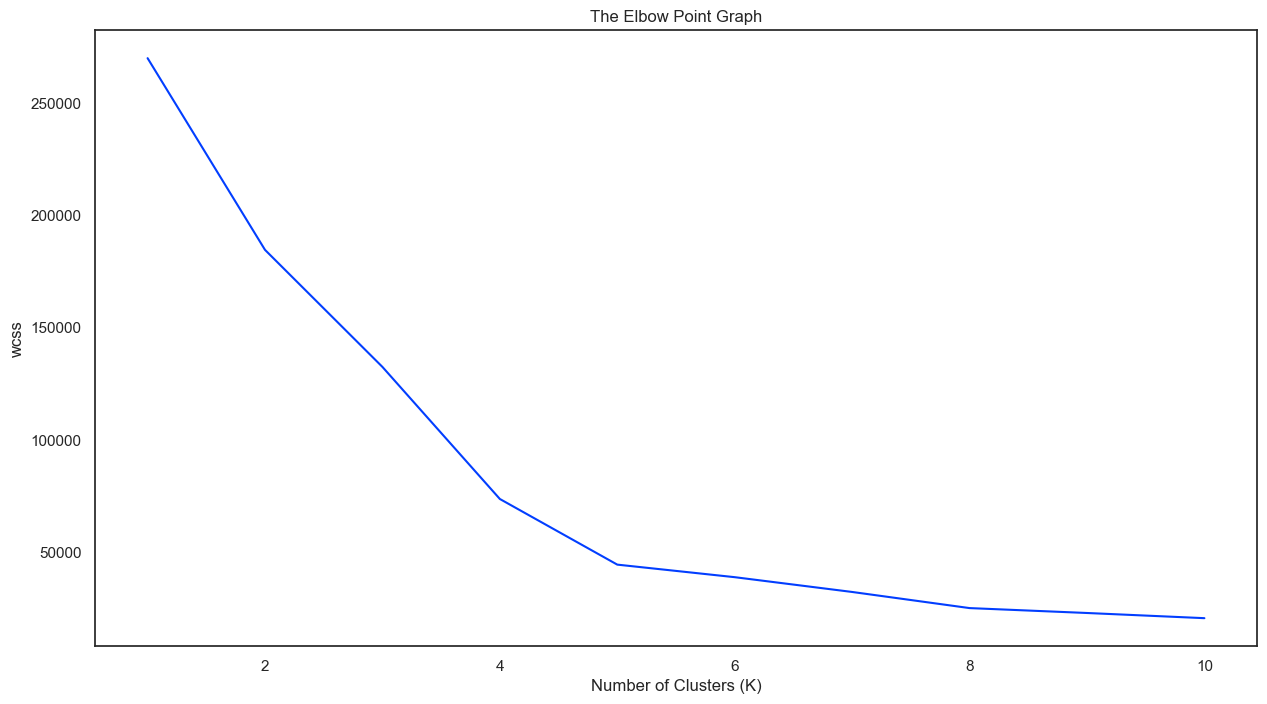

In [8]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("wcss")
plt.show()

In [9]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
Y=kmeans.fit_predict(X)

In [10]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

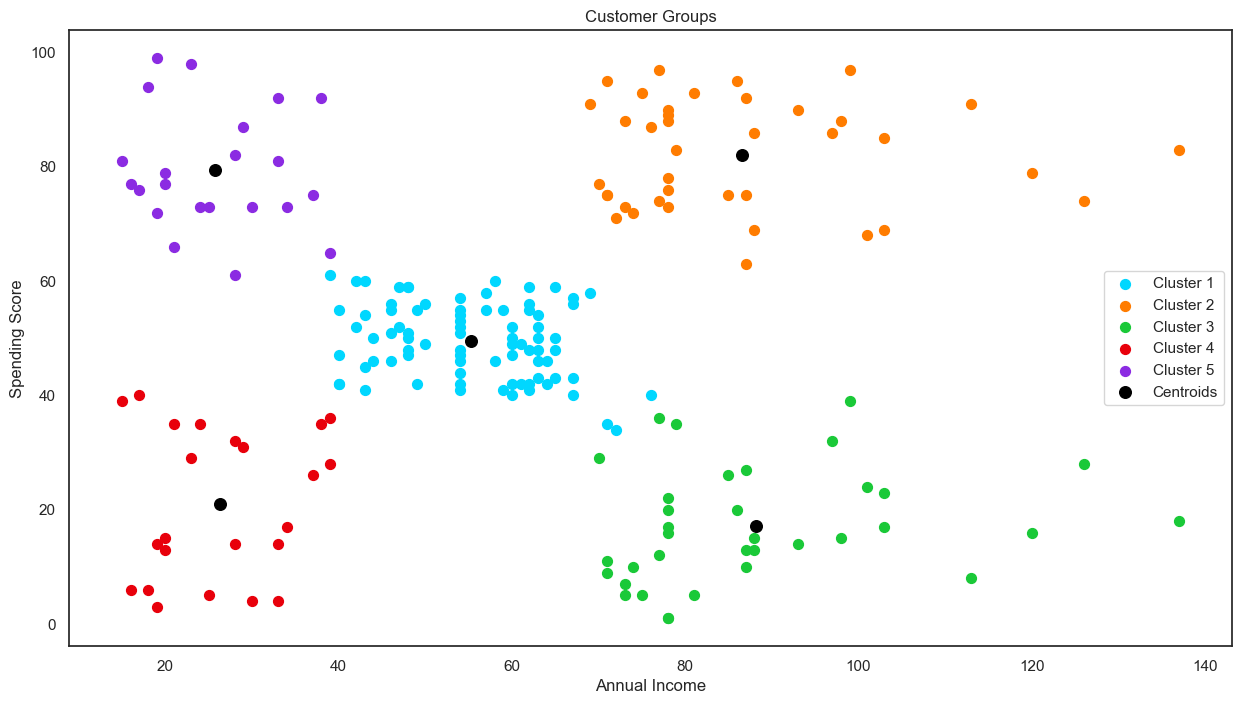

In [11]:
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,color=palette[19],label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,color=palette[1],label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,color=palette[2],label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,color=palette[3],label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,color=palette[4],label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70,color="black",label="Centroids")
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

#### Model Interpretation 
* <strong> <p style="color:#00d7ff;"> Cluster 1: Earning high but spending less </p> </strong> 
* <strong> <p style="color:#ff7c00;" > Cluster 2 : Average in terms of earning and spending </p>  </strong> 
* <strong> <p style="color:#1ac938;" > Cluster 3 : Earning high and also spending high (TARGET SET) </p> </strong> 
* <strong> <p style="color:#e8000b;">Cluster 4 : Earning less but spending more </p> </strong> 
* <strong> <p style="color:#8b2be2;">Cluster 5 : Earning less , spending less </p> </strong> 